# Visualing The Paradise Papers With Python And Neo4j

* Connect to Neo4j from Python
* Create some Pandas Dataframes from Cypher queries
* Matplotlib visualizations from Dataframe
* Bokeh chord diagram from Dataframe

In [4]:
# !pip install neo4j-driver
# !pip install pandas
# !pip install bokeh

In [1]:
from neo4j.v1 import GraphDatabase
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib inline
plt.figure(dpi=300)

## Connect to Neo4j from Python

In [6]:
# don't worry this is a read only user ;-)
driver = GraphDatabase.driver("bolt://165.227.223.190:7687", auth=("ppviz", "ppviz")) 

In [7]:
with driver.session() as session:
    results = session.run('''
    MATCH (e:Entity)
    WITH e.jurisdiction_description AS juris, COUNT(*) AS count
    WHERE count > 20
    RETURN *
    ORDER BY count ASC
    
    ''')

In [9]:
with driver.session() as session:
    results = session.run('''
    match (n) return n.sourceID, labels(n), count(*) as c order by n.sourceID, c desc
    ''')

In [10]:
df = pd.DataFrame([dict(zip(r.keys(), r.values())) for r in results])
df

,c,labels(n),n.sourceID
0,84266,[Officer],None
1,59833,[Address],None
2,24973,[Entity],None
3,3700,"[Address, Process]",None
4,2004,[Other],None
5,324,[Intermediary],None


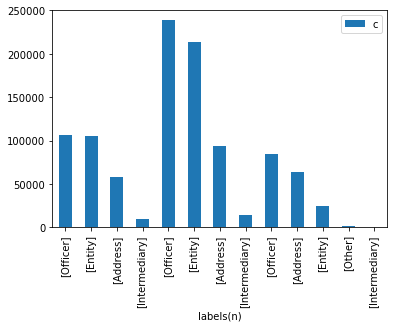

In [100]:
df.plot.bar(x="labels(n)")

In [64]:
df = pd.DataFrame([dict(zip(r.keys(), r.values())) for r in results])
df

,count,juris
0,24,Malta
1,26,Turks and Caicos Islands
2,28,Cook Islands
3,31,Liberia
4,33,Panama
5,40,Liechtenstein
6,40,Hong Kong
7,52,United States of America
8,53,Bahamas
9,101,Saint Kitts and Nevis


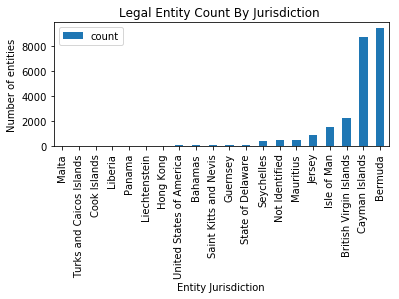

In [93]:

ax = df.plot.bar(x="juris")
ax.set_xlabel("Entity Jurisdiction")
ax.set_ylabel("Number of entities")
ax.set_title("Legal Entity Count By Jurisdiction ")
plt.gcf().subplots_adjust(bottom=0.45)

plt.savefig("entity_count", dpi=300, bbox="tight")

## Chord diagram with bokeh

![](img/chord.png)

In [16]:
from neo4j.v1 import GraphDatabase
import pandas as pd


with driver.session() as session:
    results = session.run('''
    MATCH (a:Address)<-[:REGISTERED_ADDRESS]-(o:Officer)--(e:Entity) 
    WITH a.countries AS officer_country, e.jurisdiction_description AS juris, 
    COUNT(*) AS num 
    WHERE officer_country <> juris AND num > 1000 
    RETURN * ORDER BY num DESC
    ''')   

In [17]:
df = pd.DataFrame([dict(zip(r.keys(), r.values())) for r in results])
df[:5]

,juris,num,officer_country
0,Bermuda,67392,United States
1,Cayman Islands,19740,United States
2,Bermuda,13039,United Kingdom
3,Bermuda,12259,Hong Kong
4,Bermuda,7934,Switzerland


In [37]:

from bokeh.charts import Chord
from bokeh.io import show, output_file

#df = df[df["num"] > 1000]
juris_chord = Chord(df, source="officer_country", target="juris", value="num")
output_file('juris_chord.html')
show(juris_chord)


![](img/chord.png)